In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import io

In [ ]:
buf = io.BytesIO()
plt.

In [24]:
def unix_to_datetime(unix_time):
    """
    Converts a unix timestamp to a datetime object with format yyyy-mm-dd.
    Note that UTC time is used.
    
    Args:
        unix_time: int of Unix timestamp
        
    Returns:
        datetime: a datetime object with format yyyy-mm-dd
    """
    
    timestamp = pd.to_datetime(unix_time, unit='s')

    return timestamp.strftime("%Y-%m-%d %H:%M:%S")

In [25]:
eneryield_no_normal = pd.read_csv('/home/filip-marcus/data/db_access/data/J03/classification/2025_january_classification_model.csv')
# ecom_df = pd.read_csv('/home/filip-marcus/data/kaggle_ecommers_electronic/events.csv')
df = eneryield_no_normal['timestamp'].rename('timestamp')
# df = ecom_df['event_time'].rename('timestamp')
df = pd.DataFrame(df)
# df["timestamp"] = df["timestamp"].str.replace(" UTC", "", regex=False)
# df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'].apply(unix_to_datetime))
df

,timestamp
0,2020-10-06 12:11:01
1,2020-10-06 12:11:02
2,2020-10-06 12:11:09
3,2020-10-06 12:11:11
4,2020-10-06 12:34:44
...,...
78011,2025-02-03 11:38:53
78012,2025-02-03 11:48:01
78013,2025-02-03 11:55:31
78014,2025-02-03 11:59:29


In [26]:
df['time_delta'] = df['timestamp'].diff().dt.total_seconds()
df

,timestamp,time_delta
0,2020-10-06 12:11:01,NaN
1,2020-10-06 12:11:02,1.0
2,2020-10-06 12:11:09,7.0
3,2020-10-06 12:11:11,2.0
4,2020-10-06 12:34:44,1413.0
...,...,...
78011,2025-02-03 11:38:53,182.0
78012,2025-02-03 11:48:01,548.0
78013,2025-02-03 11:55:31,450.0
78014,2025-02-03 11:59:29,238.0


Text(0.5, 1.0, 'Histogram of Time Deltas')

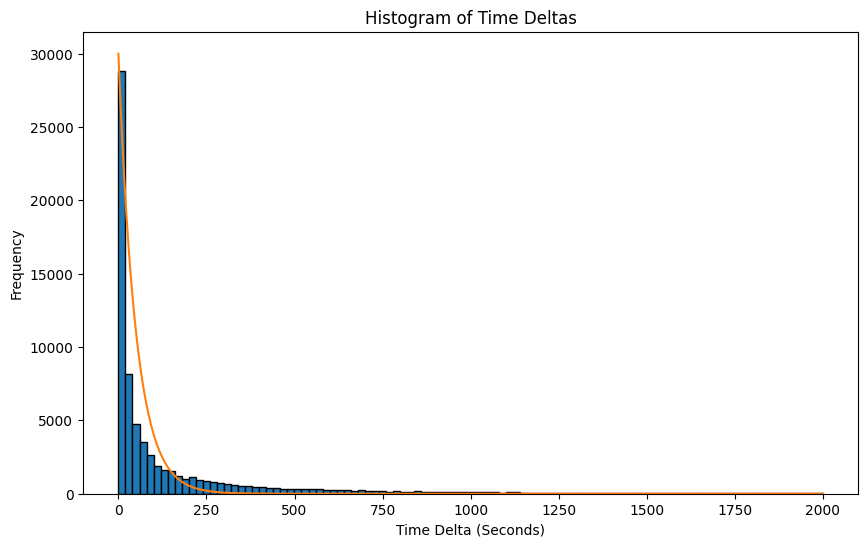

In [31]:
df = df[df['time_delta'] < 2000] # one week ahead



plt.figure(figsize=(10,6))
plt.hist(df['time_delta'].dropna(), bins=100, edgecolor='black', density=False)
x = np.linspace(0,2000,20000)
rate = 0.02
y =30000*np.exp(-rate * x)
plt.plot(x,y)
# Set labels and title
plt.xlabel('Time Delta (Seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Deltas')
# plt.yscale('log')